# Data preparation
## Modality 3: Health information
This stage has the purpose of preparing the dataset for model training, it consists on:
- Exploratory Data Analysis
- Feature engineering
- Export CSV for unimodal supervised and unsupervised approaches
- Data preparation
    - Merge based on sample dataset key
    - Group setup for LOGO CV
    - Feature scaling

## Setup

### Libraries

In [2]:
import os
import numpy as np
import pandas as pd  
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn import metrics, tree, svm, preprocessing
from sklearn.datasets import make_blobs, make_classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
import seaborn as sns; sns.set()
from seaborn import heatmap

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

### Paths

In [3]:
input_path = '../../1_feature_extraction/output/'

input_path_kinship = '../../0_source_csv/kinship_matrix/'
input_path_residents = '../../0_source_csv/ensanut/'

output_path = '../output/'

# Global configuration path
glob_conf_path = '../../config/global_config_paper.py'

### Load local variables

In [4]:
exec(open(glob_conf_path).read())

## Exploratory Data Analysis

In [5]:
# Import dataset
m3_dataset = pd.read_csv(os.path.join(input_path, "m3_feature_extraction.csv"), skipinitialspace=True)

# See shape
m3_dataset.shape

(10301, 115)

In [6]:
m3_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10301 entries, 0 to 10300
Columns: 115 entries, house_ID to hc_pers_coordination
dtypes: float64(103), int64(3), object(9)
memory usage: 9.0+ MB


In [7]:
m3_dataset.describe()

,age_months,age_years,BMI_SD,label,ob_diag,dm_diag,hbp_diag,cvd_ha_hi,cvd_chest_angina,cvd_heart_failure,...,treat_cost,meds_cost,care_travel,time_diagnosis,hc_pers_know_patient,hc_pers_questions,hc_pers_time,hc_pers_shared_dec,hc_pers_explain,hc_pers_coordination
count,10301.000000,10301.000000,10301.000000,10301.000000,10136.000000,10136.000000,10136.00000,10136.000000,10136.000000,10136.000000,...,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000
mean,137.223765,10.978934,0.886157,0.422969,1.750099,2.832577,1.84560,1.989542,1.990134,1.987964,...,1.767832,1.751049,1.899301,1.836364,2.096503,2.053147,1.911888,2.099301,1.769231,2.302098
std,47.981703,4.001291,1.121973,0.494055,0.432977,0.552242,0.36135,0.101732,0.098841,0.109053,...,0.559437,0.557212,0.519574,0.515658,1.381319,1.397266,1.368641,1.427986,1.264093,1.662213
min,60.000000,5.000000,-0.997984,0.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,96.000000,8.000000,-0.010315,0.000000,2.000000,3.000000,2.00000,2.000000,2.000000,2.000000,...,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,133.000000,11.000000,0.754806,0.000000,2.000000,3.000000,2.00000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,178.000000,14.000000,1.680194,1.000000,2.000000,3.000000,2.00000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000
max,228.000000,19.000000,4.992296,1.000000,2.000000,3.000000,2.00000,2.000000,2.000000,2.000000,...,8.000000,8.000000,8.000000,8.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


In [8]:
# Percentages of null values
m3_dataset.isnull().mean()*100

house_ID                 0.000000
household_ID             0.000000
person_ID                0.000000
region                   0.000000
strata                   0.000000
                          ...    
hc_pers_questions       93.058926
hc_pers_time            93.058926
hc_pers_shared_dec      93.058926
hc_pers_explain         93.058926
hc_pers_coordination    93.058926
Length: 115, dtype: float64

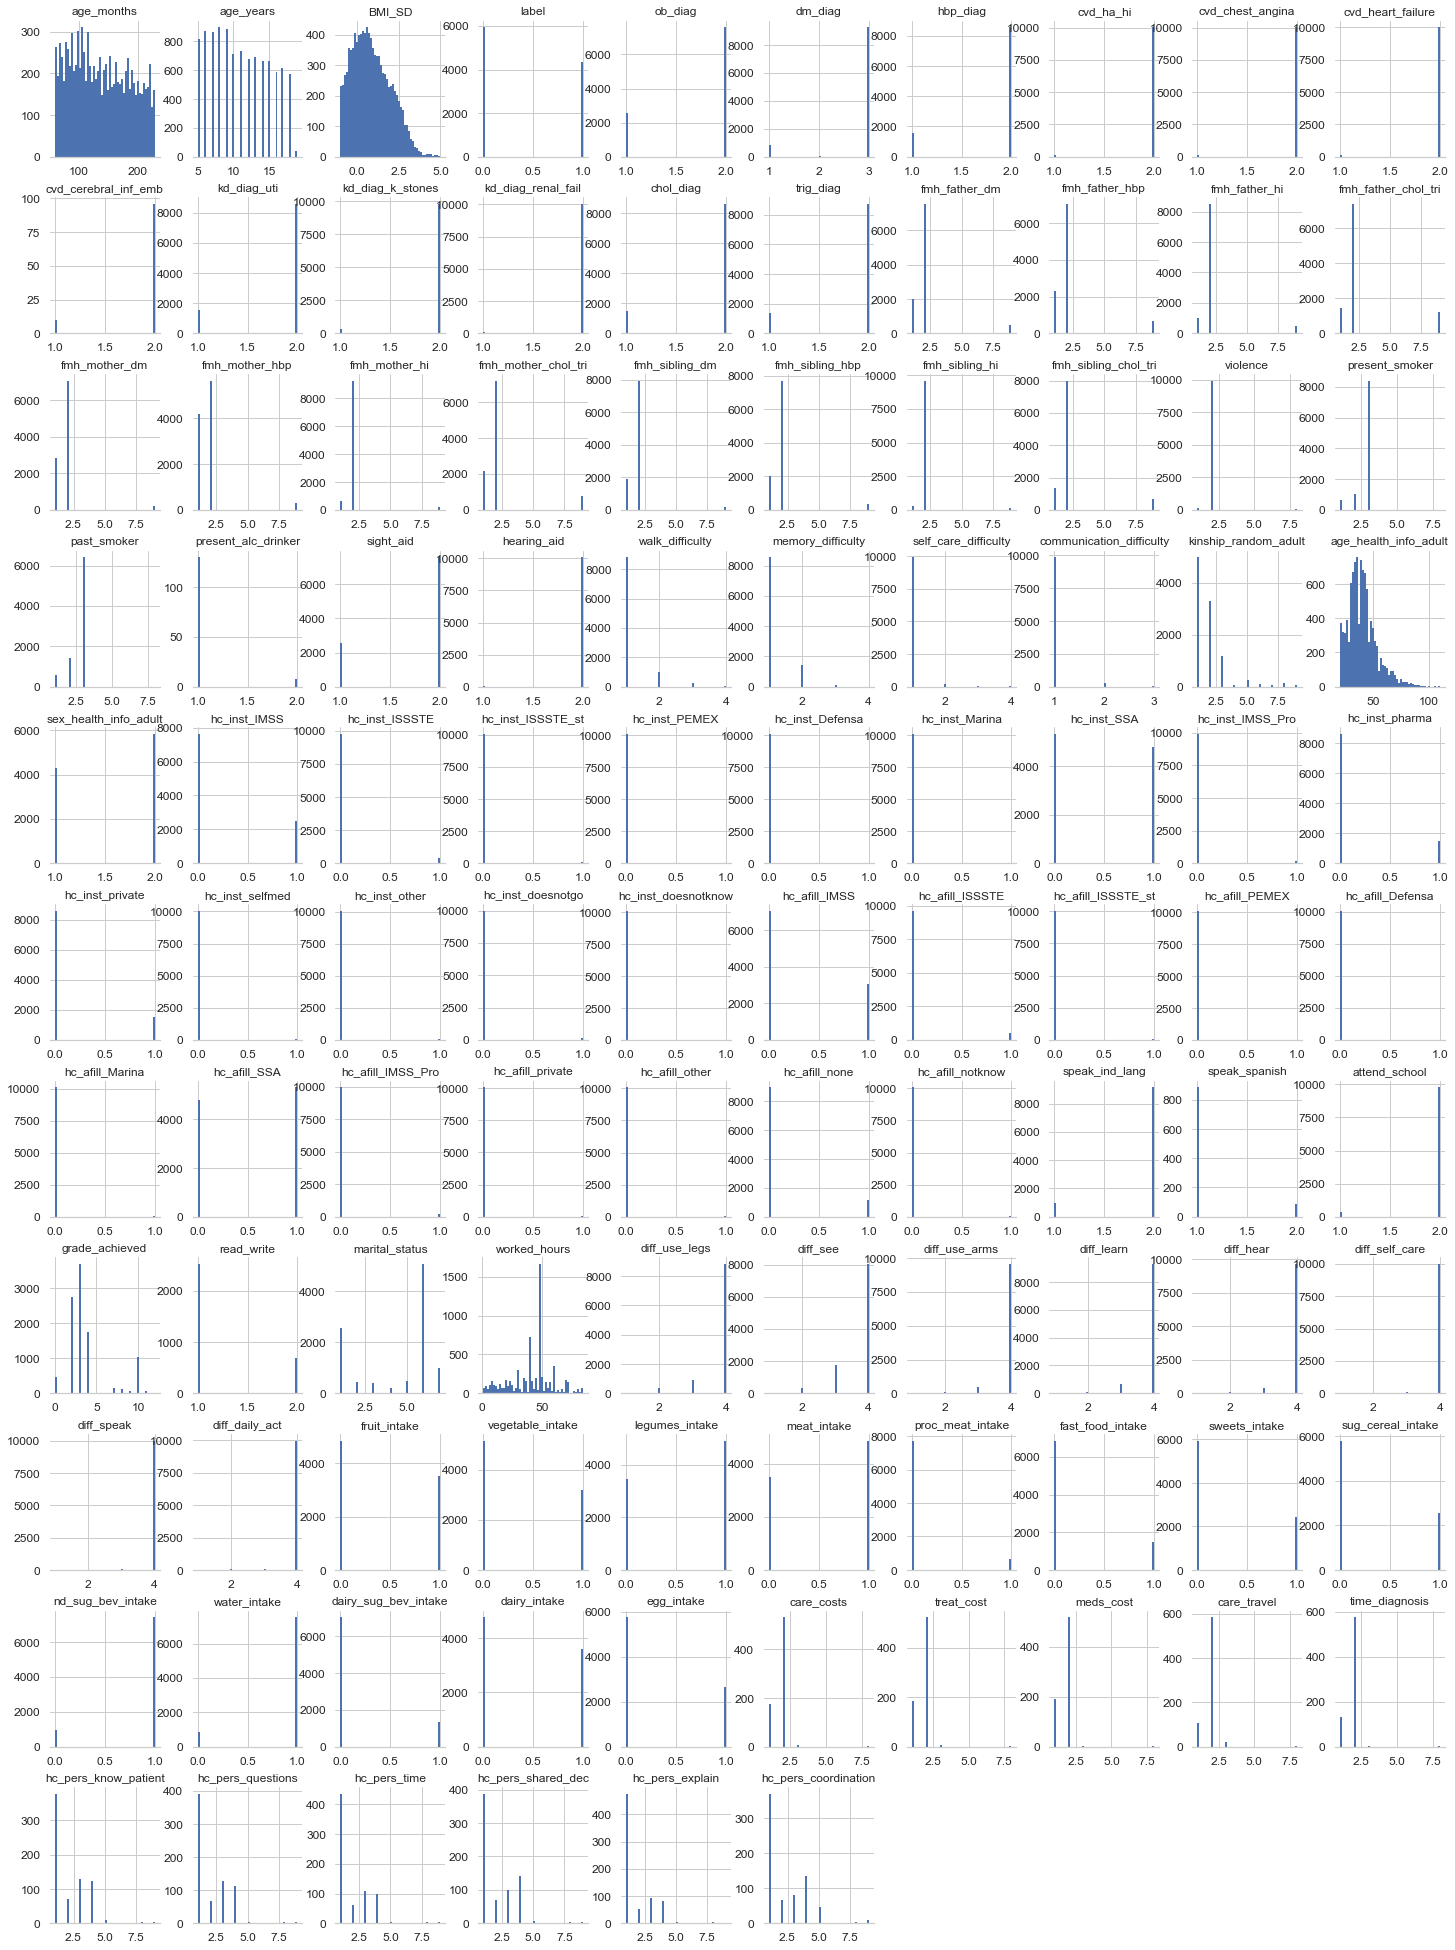

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
m3_dataset.hist(bins=50,figsize=(25,35))
plt.show()

In [10]:
m3_dataset.select_dtypes(include='float')

,BMI_SD,ob_diag,dm_diag,hbp_diag,cvd_ha_hi,cvd_chest_angina,cvd_heart_failure,cvd_cerebral_inf_emb,kd_diag_uti,kd_diag_k_stones,...,treat_cost,meds_cost,care_travel,time_diagnosis,hc_pers_know_patient,hc_pers_questions,hc_pers_time,hc_pers_shared_dec,hc_pers_explain,hc_pers_coordination
0,-0.765584,1.0,3.0,2.0,2.0,2.0,2.0,NaN,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.438604,1.0,3.0,2.0,2.0,2.0,2.0,NaN,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.133956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.413755,1.0,3.0,2.0,2.0,2.0,2.0,NaN,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.209562,2.0,3.0,2.0,2.0,2.0,2.0,NaN,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10296,0.781420,2.0,3.0,2.0,2.0,2.0,2.0,NaN,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10297,0.744382,2.0,3.0,2.0,2.0,2.0,2.0,NaN,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10298,1.403523,2.0,3.0,2.0,2.0,2.0,2.0,NaN,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10299,-0.603178,2.0,3.0,2.0,2.0,2.0,2.0,NaN,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Feature Engineering
Some transformations are convenient to reduce the dimensionality, such as:
- Compute worked_hours as <=40 hrs/week or >40 hrs/week
- Compute the relationship of the random adult to the observation
- Transform age of random adult into age ranges
- Create dummy variables of categorical features

In [11]:
# Transform features were 2:No
m3_dataset.loc[m3_dataset.ob_diag == 2, "ob_diag"] = 0
m3_dataset.loc[m3_dataset.hbp_diag == 2, "hbp_diag"] = 0
m3_dataset.loc[m3_dataset.cvd_ha_hi == 2, "cvd_ha_hi"] = 0
m3_dataset.loc[m3_dataset.cvd_chest_angina == 2, "cvd_chest_angina"] = 0
m3_dataset.loc[m3_dataset.cvd_heart_failure == 2, "cvd_heart_failure"] = 0
m3_dataset.loc[m3_dataset.cvd_cerebral_inf_emb == 2, "cvd_cerebral_inf_emb"] = 0
m3_dataset.loc[m3_dataset.cvd_cerebral_inf_emb == 9, "cvd_cerebral_inf_emb"] = np.nan
m3_dataset.loc[m3_dataset.kd_diag_uti == 2, "kd_diag_uti"] = 0
m3_dataset.loc[m3_dataset.kd_diag_k_stones == 2, "kd_diag_k_stones"] = 0
m3_dataset.loc[m3_dataset.kd_diag_renal_fail == 2, "kd_diag_renal_fail"] = 0
m3_dataset.loc[m3_dataset.chol_diag == 2, "chol_diag"] = 0
m3_dataset.loc[m3_dataset.trig_diag == 2, "trig_diag"] = 0
m3_dataset.loc[m3_dataset.violence == 2, "violence"] = 0
m3_dataset.loc[m3_dataset.violence == 8, "violence"] = np.nan
m3_dataset.loc[m3_dataset.sight_aid == 2, "sight_aid"] = 0
m3_dataset.loc[m3_dataset.hearing_aid == 2, "hearing_aid"] = 0
m3_dataset.loc[m3_dataset.speak_ind_lang == 2, "speak_ind_lang"] = 0
m3_dataset.loc[m3_dataset.speak_spanish == 2, "speak_spanish"] = 0
m3_dataset.loc[m3_dataset.attend_school == 2, "attend_school"] = 0
m3_dataset.loc[m3_dataset.read_write == 2, "read_write"] = 0

# Transform features were 2:No and another answer is NaN
m3_dataset.loc[m3_dataset.fmh_father_dm == 2, "fmh_father_dm"] = 0
m3_dataset.loc[m3_dataset.fmh_father_dm == 9, "fmh_father_dm"] = np.nan

m3_dataset.loc[m3_dataset.fmh_father_hbp == 2, "fmh_father_hbp"] = 0
m3_dataset.loc[m3_dataset.fmh_father_hbp == 9, "fmh_father_hbp"] = np.nan

m3_dataset.loc[m3_dataset.fmh_father_hi == 2, "fmh_father_hi"] = 0
m3_dataset.loc[m3_dataset.fmh_father_hi == 9, "fmh_father_hi"] = np.nan

m3_dataset.loc[m3_dataset.fmh_father_chol_tri == 2, "fmh_father_chol_tri"] = 0
m3_dataset.loc[m3_dataset.fmh_father_chol_tri == 9, "fmh_father_chol_tri"] = np.nan

m3_dataset.loc[m3_dataset.fmh_mother_dm == 2, "fmh_mother_dm"] = 0
m3_dataset.loc[m3_dataset.fmh_mother_dm == 9, "fmh_mother_dm"] = np.nan

m3_dataset.loc[m3_dataset.fmh_mother_hbp == 2, "fmh_mother_hbp"] = 0
m3_dataset.loc[m3_dataset.fmh_mother_hbp == 9, "fmh_mother_hbp"] = np.nan

m3_dataset.loc[m3_dataset.fmh_mother_hi == 2, "fmh_mother_hi"] = 0
m3_dataset.loc[m3_dataset.fmh_mother_hi == 9, "fmh_mother_hi"] = np.nan

m3_dataset.loc[m3_dataset.fmh_mother_chol_tri == 2, "fmh_mother_chol_tri"] = 0
m3_dataset.loc[m3_dataset.fmh_mother_chol_tri == 9, "fmh_mother_chol_tri"] = np.nan

m3_dataset.loc[m3_dataset.fmh_sibling_dm == 2, "fmh_sibling_dm"] = 0
m3_dataset.loc[m3_dataset.fmh_sibling_dm == 9, "fmh_sibling_dm"] = np.nan

m3_dataset.loc[m3_dataset.fmh_sibling_hbp == 2, "fmh_sibling_hbp"] = 0
m3_dataset.loc[m3_dataset.fmh_sibling_hbp == 9, "fmh_sibling_hbp"] = np.nan

m3_dataset.loc[m3_dataset.fmh_sibling_hi == 2, "fmh_sibling_hi"] = 0
m3_dataset.loc[m3_dataset.fmh_sibling_hi == 9, "fmh_sibling_hi"] = np.nan

m3_dataset.loc[m3_dataset.fmh_sibling_chol_tri == 2, "fmh_sibling_chol_tri"] = 0
m3_dataset.loc[m3_dataset.fmh_sibling_chol_tri == 9, "fmh_sibling_chol_tri"] = np.nan

# Transform features with more than one answer into binary answers 0:No 1:Yes
m3_dataset.loc[m3_dataset.dm_diag == 2, "dm_diag"] = 0
m3_dataset.loc[m3_dataset.dm_diag == 3, "dm_diag"] = 0

m3_dataset.loc[m3_dataset.present_smoker == 1, "present_smoker"] = 1
m3_dataset.loc[m3_dataset.present_smoker == 2, "present_smoker"] = 1
m3_dataset.loc[m3_dataset.present_smoker == 3, "present_smoker"] = 0
m3_dataset.loc[m3_dataset.present_smoker == 8, "present_smoker"] = np.nan

m3_dataset.loc[m3_dataset.past_smoker == 2, "past_smoker"] = 1
m3_dataset.loc[m3_dataset.past_smoker == 3, "past_smoker"] = 0
m3_dataset.loc[m3_dataset.past_smoker == 8, "past_smoker"] = np.nan

m3_dataset.loc[m3_dataset.present_alc_drinker == 2, "present_alc_drinker"] = 0
m3_dataset.loc[m3_dataset.present_alc_drinker == 3, "present_alc_drinker"] = 0

m3_dataset.loc[m3_dataset.walk_difficulty == 1, "walk_difficulty"] = 0
m3_dataset.loc[m3_dataset.walk_difficulty == 2, "walk_difficulty"] = 1
m3_dataset.loc[m3_dataset.walk_difficulty == 3, "walk_difficulty"] = 1
m3_dataset.loc[m3_dataset.walk_difficulty == 4, "walk_difficulty"] = 1

m3_dataset.loc[m3_dataset.memory_difficulty == 1, "memory_difficulty"] = 0
m3_dataset.loc[m3_dataset.memory_difficulty == 2, "memory_difficulty"] = 1
m3_dataset.loc[m3_dataset.memory_difficulty == 3, "memory_difficulty"] = 1
m3_dataset.loc[m3_dataset.memory_difficulty == 4, "memory_difficulty"] = 1

m3_dataset.loc[m3_dataset.self_care_difficulty == 1, "self_care_difficulty"] = 0
m3_dataset.loc[m3_dataset.self_care_difficulty == 2, "self_care_difficulty"] = 1
m3_dataset.loc[m3_dataset.self_care_difficulty == 3, "self_care_difficulty"] = 1
m3_dataset.loc[m3_dataset.self_care_difficulty == 4, "self_care_difficulty"] = 1

m3_dataset.loc[m3_dataset.communication_difficulty == 1, "communication_difficulty"] = 0
m3_dataset.loc[m3_dataset.communication_difficulty == 2, "communication_difficulty"] = 1
m3_dataset.loc[m3_dataset.communication_difficulty == 3, "communication_difficulty"] = 1
m3_dataset.loc[m3_dataset.communication_difficulty == 4, "communication_difficulty"] = 1

m3_dataset.loc[m3_dataset.diff_use_legs == 1, "diff_use_legs"] = 0
m3_dataset.loc[m3_dataset.diff_use_legs == 2, "diff_use_legs"] = 1
m3_dataset.loc[m3_dataset.diff_use_legs == 3, "diff_use_legs"] = 1
m3_dataset.loc[m3_dataset.diff_use_legs == 4, "diff_use_legs"] = 1

m3_dataset.loc[m3_dataset.diff_see == 1, "diff_see"] = 0
m3_dataset.loc[m3_dataset.diff_see == 2, "diff_see"] = 1
m3_dataset.loc[m3_dataset.diff_see == 3, "diff_see"] = 1
m3_dataset.loc[m3_dataset.diff_see == 4, "diff_see"] = 1

m3_dataset.loc[m3_dataset.diff_use_arms == 1, "diff_use_arms"] = 0
m3_dataset.loc[m3_dataset.diff_use_arms == 2, "diff_use_arms"] = 1
m3_dataset.loc[m3_dataset.diff_use_arms == 3, "diff_use_arms"] = 1
m3_dataset.loc[m3_dataset.diff_use_arms == 4, "diff_use_arms"] = 1

m3_dataset.loc[m3_dataset.diff_learn == 1, "diff_learn"] = 0
m3_dataset.loc[m3_dataset.diff_learn == 2, "diff_learn"] = 1
m3_dataset.loc[m3_dataset.diff_learn == 3, "diff_learn"] = 1
m3_dataset.loc[m3_dataset.diff_learn == 4, "diff_learn"] = 1

m3_dataset.loc[m3_dataset.diff_hear == 1, "diff_hear"] = 0
m3_dataset.loc[m3_dataset.diff_hear == 2, "diff_hear"] = 1
m3_dataset.loc[m3_dataset.diff_hear == 3, "diff_hear"] = 1
m3_dataset.loc[m3_dataset.diff_hear == 4, "diff_hear"] = 1

m3_dataset.loc[m3_dataset.diff_self_care == 1, "diff_self_care"] = 0
m3_dataset.loc[m3_dataset.diff_self_care == 2, "diff_self_care"] = 1
m3_dataset.loc[m3_dataset.diff_self_care == 3, "diff_self_care"] = 1
m3_dataset.loc[m3_dataset.diff_self_care == 4, "diff_self_care"] = 1

m3_dataset.loc[m3_dataset.diff_speak == 1, "diff_speak"] = 0
m3_dataset.loc[m3_dataset.diff_speak == 2, "diff_speak"] = 1
m3_dataset.loc[m3_dataset.diff_speak == 3, "diff_speak"] = 1
m3_dataset.loc[m3_dataset.diff_speak == 4, "diff_speak"] = 1

m3_dataset.loc[m3_dataset.diff_daily_act == 1, "diff_daily_act"] = 0
m3_dataset.loc[m3_dataset.diff_daily_act == 2, "diff_daily_act"] = 1
m3_dataset.loc[m3_dataset.diff_daily_act == 3, "diff_daily_act"] = 1
m3_dataset.loc[m3_dataset.diff_daily_act == 4, "diff_daily_act"] = 1

In [12]:
m3_dataset.select_dtypes(include='float')

,BMI_SD,ob_diag,dm_diag,hbp_diag,cvd_ha_hi,cvd_chest_angina,cvd_heart_failure,cvd_cerebral_inf_emb,kd_diag_uti,kd_diag_k_stones,...,treat_cost,meds_cost,care_travel,time_diagnosis,hc_pers_know_patient,hc_pers_questions,hc_pers_time,hc_pers_shared_dec,hc_pers_explain,hc_pers_coordination
0,-0.765584,1.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.438604,1.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.133956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.413755,1.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.209562,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10296,0.781420,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10297,0.744382,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10298,1.403523,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10299,-0.603178,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Compute worked_hours as <=40 hrs/week or >40 hrs/week

In [13]:
m3_dataset.loc[m3_dataset.worked_hours <= 40, "worked_hours"] = 0
m3_dataset.loc[m3_dataset.worked_hours > 40, "worked_hours"] = 1

In [14]:
m3_dataset

,house_ID,household_ID,person_ID,region,strata,locality_type,locality_size,age_months,age_years,sex,...,treat_cost,meds_cost,care_travel,time_diagnosis,hc_pers_know_patient,hc_pers_questions,hc_pers_time,hc_pers_shared_dec,hc_pers_explain,hc_pers_coordination
0,1_4,1_4_1,1_4_1_8,Centre,3rd_strata,urban,">100,000",122,10,female,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3_2,3_2_1,3_2_1_5,Centre,2nd_strata,urban,">100,000",149,12,female,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4_1,4_1_1,4_1_1_4,Centre,2nd_strata,urban,">100,000",162,13,male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4_3,4_3_1,4_3_1_5,Centre,2nd_strata,urban,">100,000",197,16,male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4_5,4_5_1,4_5_1_5,Centre,2nd_strata,urban,">100,000",169,14,male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10296,3938_17,3938_17_1,3938_17_1_3,Centre,2nd_strata,rural,"<2,500",130,10,male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10297,3938_17,3938_17_1,3938_17_1_4,Centre,2nd_strata,rural,"<2,500",119,9,female,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10298,3938_19,3938_19_1,3938_19_1_3,Centre,2nd_strata,rural,"<2,500",170,14,male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10299,3938_19,3938_19_1,3938_19_1_5,Centre,2nd_strata,rural,"<2,500",89,7,female,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Compute the relationship of the random adult to the observation

In [15]:
# First it is necessary to include the relationship column for the observation (child or adolescent) to the sample dataset
# Import observation and residents dataset
sample_dataset = pd.read_csv(os.path.join(input_path, "sample_dataset.csv"))

residents_dataset = pd.read_csv(os.path.join(input_path_residents, "CS_RESIDENTES.csv"))
residents_dataset = residents_dataset[["UPM","VIV_SEL","HOGAR","NUMREN","EDAD","SEXO","P3_5"]]
residents_dataset = residents_dataset.rename(columns={"P3_5": "kinship",})

# Add column with primary keys for house and household
residents_dataset["person_ID"] = residents_dataset["UPM"].astype(str)+'_'+residents_dataset["VIV_SEL"].astype(str)+'_'+residents_dataset["HOGAR"].astype(str)+'_'+residents_dataset["NUMREN"].astype(str)

# Delete unnecesary columns 
del residents_dataset["UPM"]
del residents_dataset["VIV_SEL"]
del residents_dataset["HOGAR"]
del residents_dataset["NUMREN"]

# Generate dataframe with person_ID and kinship
kinships = pd.DataFrame(residents_dataset[["person_ID","kinship"]])
kinships

,person_ID,kinship
0,34_1_1_2,2
1,34_1_1_3,3
2,34_2_1_1,1
3,34_2_1_2,2
4,34_2_1_3,3
...,...,...
158039,6287_20_1_3,3
158040,6287_20_1_4,3
158041,6287_21_1_1,1
158042,6287_21_1_2,3


In [16]:
# Merge with everything else
m3_dataset = m3_dataset.merge(kinships, left_on="person_ID", right_on="person_ID", how="left", suffixes=('', '_remove'))

# Drop repeated columns
m3_dataset.drop([i for i in m3_dataset.columns if 'remove' in i],
               axis=1, inplace=True)
m3_dataset

# Rename columns to identify them as observation columns
m3_dataset = m3_dataset.rename(columns={"kinship":"kinship_pediatric"})

m3_dataset

,house_ID,household_ID,person_ID,region,strata,locality_type,locality_size,age_months,age_years,sex,...,meds_cost,care_travel,time_diagnosis,hc_pers_know_patient,hc_pers_questions,hc_pers_time,hc_pers_shared_dec,hc_pers_explain,hc_pers_coordination,kinship_pediatric
0,1_4,1_4_1,1_4_1_8,Centre,3rd_strata,urban,">100,000",122,10,female,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
1,3_2,3_2_1,3_2_1_5,Centre,2nd_strata,urban,">100,000",149,12,female,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
2,4_1,4_1_1,4_1_1_4,Centre,2nd_strata,urban,">100,000",162,13,male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
3,4_3,4_3_1,4_3_1_5,Centre,2nd_strata,urban,">100,000",197,16,male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
4,4_5,4_5_1,4_5_1_5,Centre,2nd_strata,urban,">100,000",169,14,male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10296,3938_17,3938_17_1,3938_17_1_3,Centre,2nd_strata,rural,"<2,500",130,10,male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
10297,3938_17,3938_17_1,3938_17_1_4,Centre,2nd_strata,rural,"<2,500",119,9,female,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
10298,3938_19,3938_19_1,3938_19_1_3,Centre,2nd_strata,rural,"<2,500",170,14,male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
10299,3938_19,3938_19_1,3938_19_1_5,Centre,2nd_strata,rural,"<2,500",89,7,female,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3


In [17]:
m3_dataset.duplicated().sum()

0

In [18]:
kinship_matrix = pd.read_csv(os.path.join(input_path_kinship, "kinship_matrix.csv"))
kinship_matrix

,Obs_answer,1,2,3,4,5,6,7,8,9
0,1,1,2,6,9,18,3,15,23,21
1,2,2,22,6,9,18,15,3,23,21
2,3,3,3,7,24,19,10,10,20,21
3,4,10,10,26,25,5,12,12,20,21
4,5,15,15,19,8,14,17,17,20,21
5,6,6,18,9,11,16,2,13,20,21
6,7,18,6,9,11,16,13,2,20,21
7,8,20,20,20,20,20,20,20,20,21
8,9,21,21,21,21,21,21,21,20,21


In [19]:
def kinship_translation (kinship_pediatric, kinship_random_adult):
    if kinship_random_adult > 0:
        # Asign row and column values according to observation (row) or random adult (column) answers
        column = kinship_matrix.columns.get_loc(f'{int(kinship_random_adult)}')
        row = kinship_matrix.index[kinship_matrix["Obs_answer"] == kinship_pediatric]
        
        # Return the value as integer of the location where row and column meet
        kinship = int(kinship_matrix.iloc[row, column])
        
        return kinship
    
    elif kinship_random_adult == np.nan:
        return np.nan

In [20]:
def list_comp_kinship(df):
      return pd.Series([
    kinship_translation(kinship_pediatric, kinship_random_adult)
    for (kinship_pediatric, kinship_random_adult) in zip(df["kinship_pediatric"], df["kinship_random_adult"])
  ])
  
m3_dataset["kinship"] = list_comp_kinship(m3_dataset)

In [21]:
# Rename 
m3_dataset["kinship"] = m3_dataset["kinship"].replace([1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,
                                                                 11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,
                                                                 21.0,22.0,23.0,24.0,25.0,26.0], 
                                                       ["Chief",
                                                        "Partner",
                                                        "Parent",
                                                        "Mother or father",
                                                        "Mother/father or uncle/aunt",
                                                        "Son/Daughter",
                                                        "Sibling",
                                                        "Child or niece/nephew",
                                                        "Grandchild",
                                                        "Grandparent",
                                                        "Great grandchild",
                                                        "Great grandparent",
                                                        "In-laws",
                                                        "Sibling or brother/sister-in-law",
                                                        "Mother/father-in-law",
                                                        "Grandchild in law",
                                                        "Grandparent in law",
                                                        "Son/Daughter in law",
                                                        "Partner or brother/sister-in-law",
                                                        "Unknown",
                                                        "No kinship",
                                                        "Second partner (illegal in Mexico)",
                                                        "Other",
                                                        "Son/daughter or niece/nephew",
                                                        "Sibling or cousin",
                                                        "Parent or uncle/aunt"])
m3_dataset["kinship"].value_counts()

Parent                                6964
Grandparent                           1098
Parent or uncle/aunt                   566
Sibling                                559
Unknown                                372
No kinship                             192
Mother/father or uncle/aunt            176
Partner or brother/sister-in-law        92
Sibling or cousin                       38
Partner                                 33
Mother/father-in-law                    28
Great grandparent                       12
Son/daughter or niece/nephew             2
Other                                    1
Son/Daughter                             1
Sibling or brother/sister-in-law         1
Second partner (illegal in Mexico)       1
Name: kinship, dtype: int64

There  is one instance with a 22 relationship (Second partner), it may as well be an error. So we will take a closer look.

In [22]:
weird_obs = pd.DataFrame(m3_dataset.loc[(m3_dataset["kinship"]=="Second partner (illegal in Mexico)")])
weird_obs

,house_ID,household_ID,person_ID,region,strata,locality_type,locality_size,age_months,age_years,sex,...,care_travel,time_diagnosis,hc_pers_know_patient,hc_pers_questions,hc_pers_time,hc_pers_shared_dec,hc_pers_explain,hc_pers_coordination,kinship_pediatric,kinship
7041,2883_4,2883_4_1,2883_4_1_3,South,1st_strata,rural,"<2,500",117,9,male,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2,Second partner (illegal in Mexico)


In [23]:
print("Age of observation: ", (weird_obs["age_months"].loc[7041])/12)
print("Sex of observation: ", weird_obs["sex"].loc[7041])
print("Relationship to household chief: ", weird_obs["kinship_pediatric"].loc[7041])
print()
print("Age of random adult: ", weird_obs["age_health_info_adult"].loc[7041])
print("Sex of random adult: ", weird_obs["sex_health_info_adult"].loc[7041])
print("Relationship to household chief: ", weird_obs["kinship_random_adult"].loc[7041])


Age of observation:  9.75
Sex of observation:  male
Relationship to household chief:  2

Age of random adult:  37.0
Sex of random adult:  2.0
Relationship to household chief:  2.0


Since it seems to be an error, the observation will be removed.

In [24]:
m3_dataset.loc[m3_dataset["kinship"]=="Second partner (illegal in Mexico)", "kinship"] = np.nan

In [25]:
m3_dataset["kinship"].value_counts()

Parent                              6964
Grandparent                         1098
Parent or uncle/aunt                 566
Sibling                              559
Unknown                              372
No kinship                           192
Mother/father or uncle/aunt          176
Partner or brother/sister-in-law      92
Sibling or cousin                     38
Partner                               33
Mother/father-in-law                  28
Great grandparent                     12
Son/daughter or niece/nephew           2
Other                                  1
Son/Daughter                           1
Sibling or brother/sister-in-law       1
Name: kinship, dtype: int64

Other realtionships do not make sense since the random adult was someone over 20 years. For instance, that the random adult is the Son/Daughter of the child or adolescent (5-19 years). Hence, the following observations will also be considered NaN values.
- 06: Son/Daughter
- 24: Son/daughter or niece/nephew

In [26]:
m3_dataset.loc[m3_dataset["kinship"]=="Son/Daughter", "kinship"] = np.nan
m3_dataset.loc[m3_dataset["kinship"]=="Son/daughter or niece/nephew", "kinship"] = np.nan

In [27]:
m3_dataset["kinship"].value_counts()

Parent                              6964
Grandparent                         1098
Parent or uncle/aunt                 566
Sibling                              559
Unknown                              372
No kinship                           192
Mother/father or uncle/aunt          176
Partner or brother/sister-in-law      92
Sibling or cousin                     38
Partner                               33
Mother/father-in-law                  28
Great grandparent                     12
Other                                  1
Sibling or brother/sister-in-law       1
Name: kinship, dtype: int64

In [28]:
# Finally lets delete the columns used to translate the kinship
del m3_dataset["kinship_pediatric"]
del m3_dataset["kinship_random_adult"]

# Rename column to identify the modality
m3_dataset = m3_dataset.rename(columns={"kinship":"kinship_health_info_adult"})
m3_dataset["kinship_health_info_adult"]

0        Parent or uncle/aunt
1                 Grandparent
2                         NaN
3                     Sibling
4                 Grandparent
                 ...         
10296    Parent or uncle/aunt
10297    Parent or uncle/aunt
10298                  Parent
10299                  Parent
10300                  Parent
Name: kinship_health_info_adult, Length: 10301, dtype: object

### Transform age of random adult into age ranges

In [29]:
def transform_to_age_ranges(age):
    if (age['age_health_info_adult'] < 20):
        return "ERROR- minor registered as adult"
    if (age['age_health_info_adult'] >= 20 and age["age_health_info_adult"] < 30):
        return "20-29"
    elif (age['age_health_info_adult'] >= 30 and age["age_health_info_adult"] < 40):
        return "30-39"
    elif (age['age_health_info_adult'] >= 40 and age["age_health_info_adult"] < 50):
        return "40-49"
    elif (age['age_health_info_adult'] >= 50 and age["age_health_info_adult"] < 60):
        return "50-59"
    elif (age['age_health_info_adult'] >= 60 and age["age_health_info_adult"] < 70):
        return "60-69"
    elif (age['age_health_info_adult'] >= 70 and age["age_health_info_adult"] < 80):
        return "70-79"
    elif (age['age_health_info_adult'] >= 80 and age["age_health_info_adult"] < 90):
        return "80-89"
    elif (age['age_health_info_adult'] >= 90):
        return "90 or more"
    else:
        return np.nan

In [30]:
# Apply functions using lambdas
m3_dataset["age_group_health_info_adult"] = m3_dataset.apply(lambda age: transform_to_age_ranges(age), axis=1)

# Delete numerical column
del m3_dataset["age_health_info_adult"]

In [31]:
m3_dataset["age_group_health_info_adult"].value_counts()

30-39         3579
40-49         2733
20-29         1933
50-59         1062
60-69          512
70-79          207
80-89           88
90 or more      22
Name: age_group_health_info_adult, dtype: int64

### Check NaN values

In [32]:
percent_missing = m3_dataset.isnull().mean()*100
missing_values = pd.DataFrame({'column_name':m3_dataset.columns, 
                               'percent_missing':percent_missing})
missing_values.sort_values('percent_missing', inplace=True, ascending=False)
missing_values.head(20)

,column_name,percent_missing
cvd_cerebral_inf_emb,cvd_cerebral_inf_emb,98.970974
present_alc_drinker,present_alc_drinker,98.660324
treat_cost,treat_cost,93.058926
hc_pers_explain,hc_pers_explain,93.058926
hc_pers_shared_dec,hc_pers_shared_dec,93.058926
hc_pers_time,hc_pers_time,93.058926
hc_pers_questions,hc_pers_questions,93.058926
hc_pers_know_patient,hc_pers_know_patient,93.058926
time_diagnosis,time_diagnosis,93.058926
care_travel,care_travel,93.058926


Drop all columns with more than 35% of missing values. 

In [33]:
percentage = 35.0
min_percentage = int(((100-percentage)/100)*m3_dataset.shape[0] + 1)
m3_dataset = m3_dataset.dropna(axis=1,
                               thresh=min_percentage)
m3_dataset.shape

(10301, 100)

### Check correlations

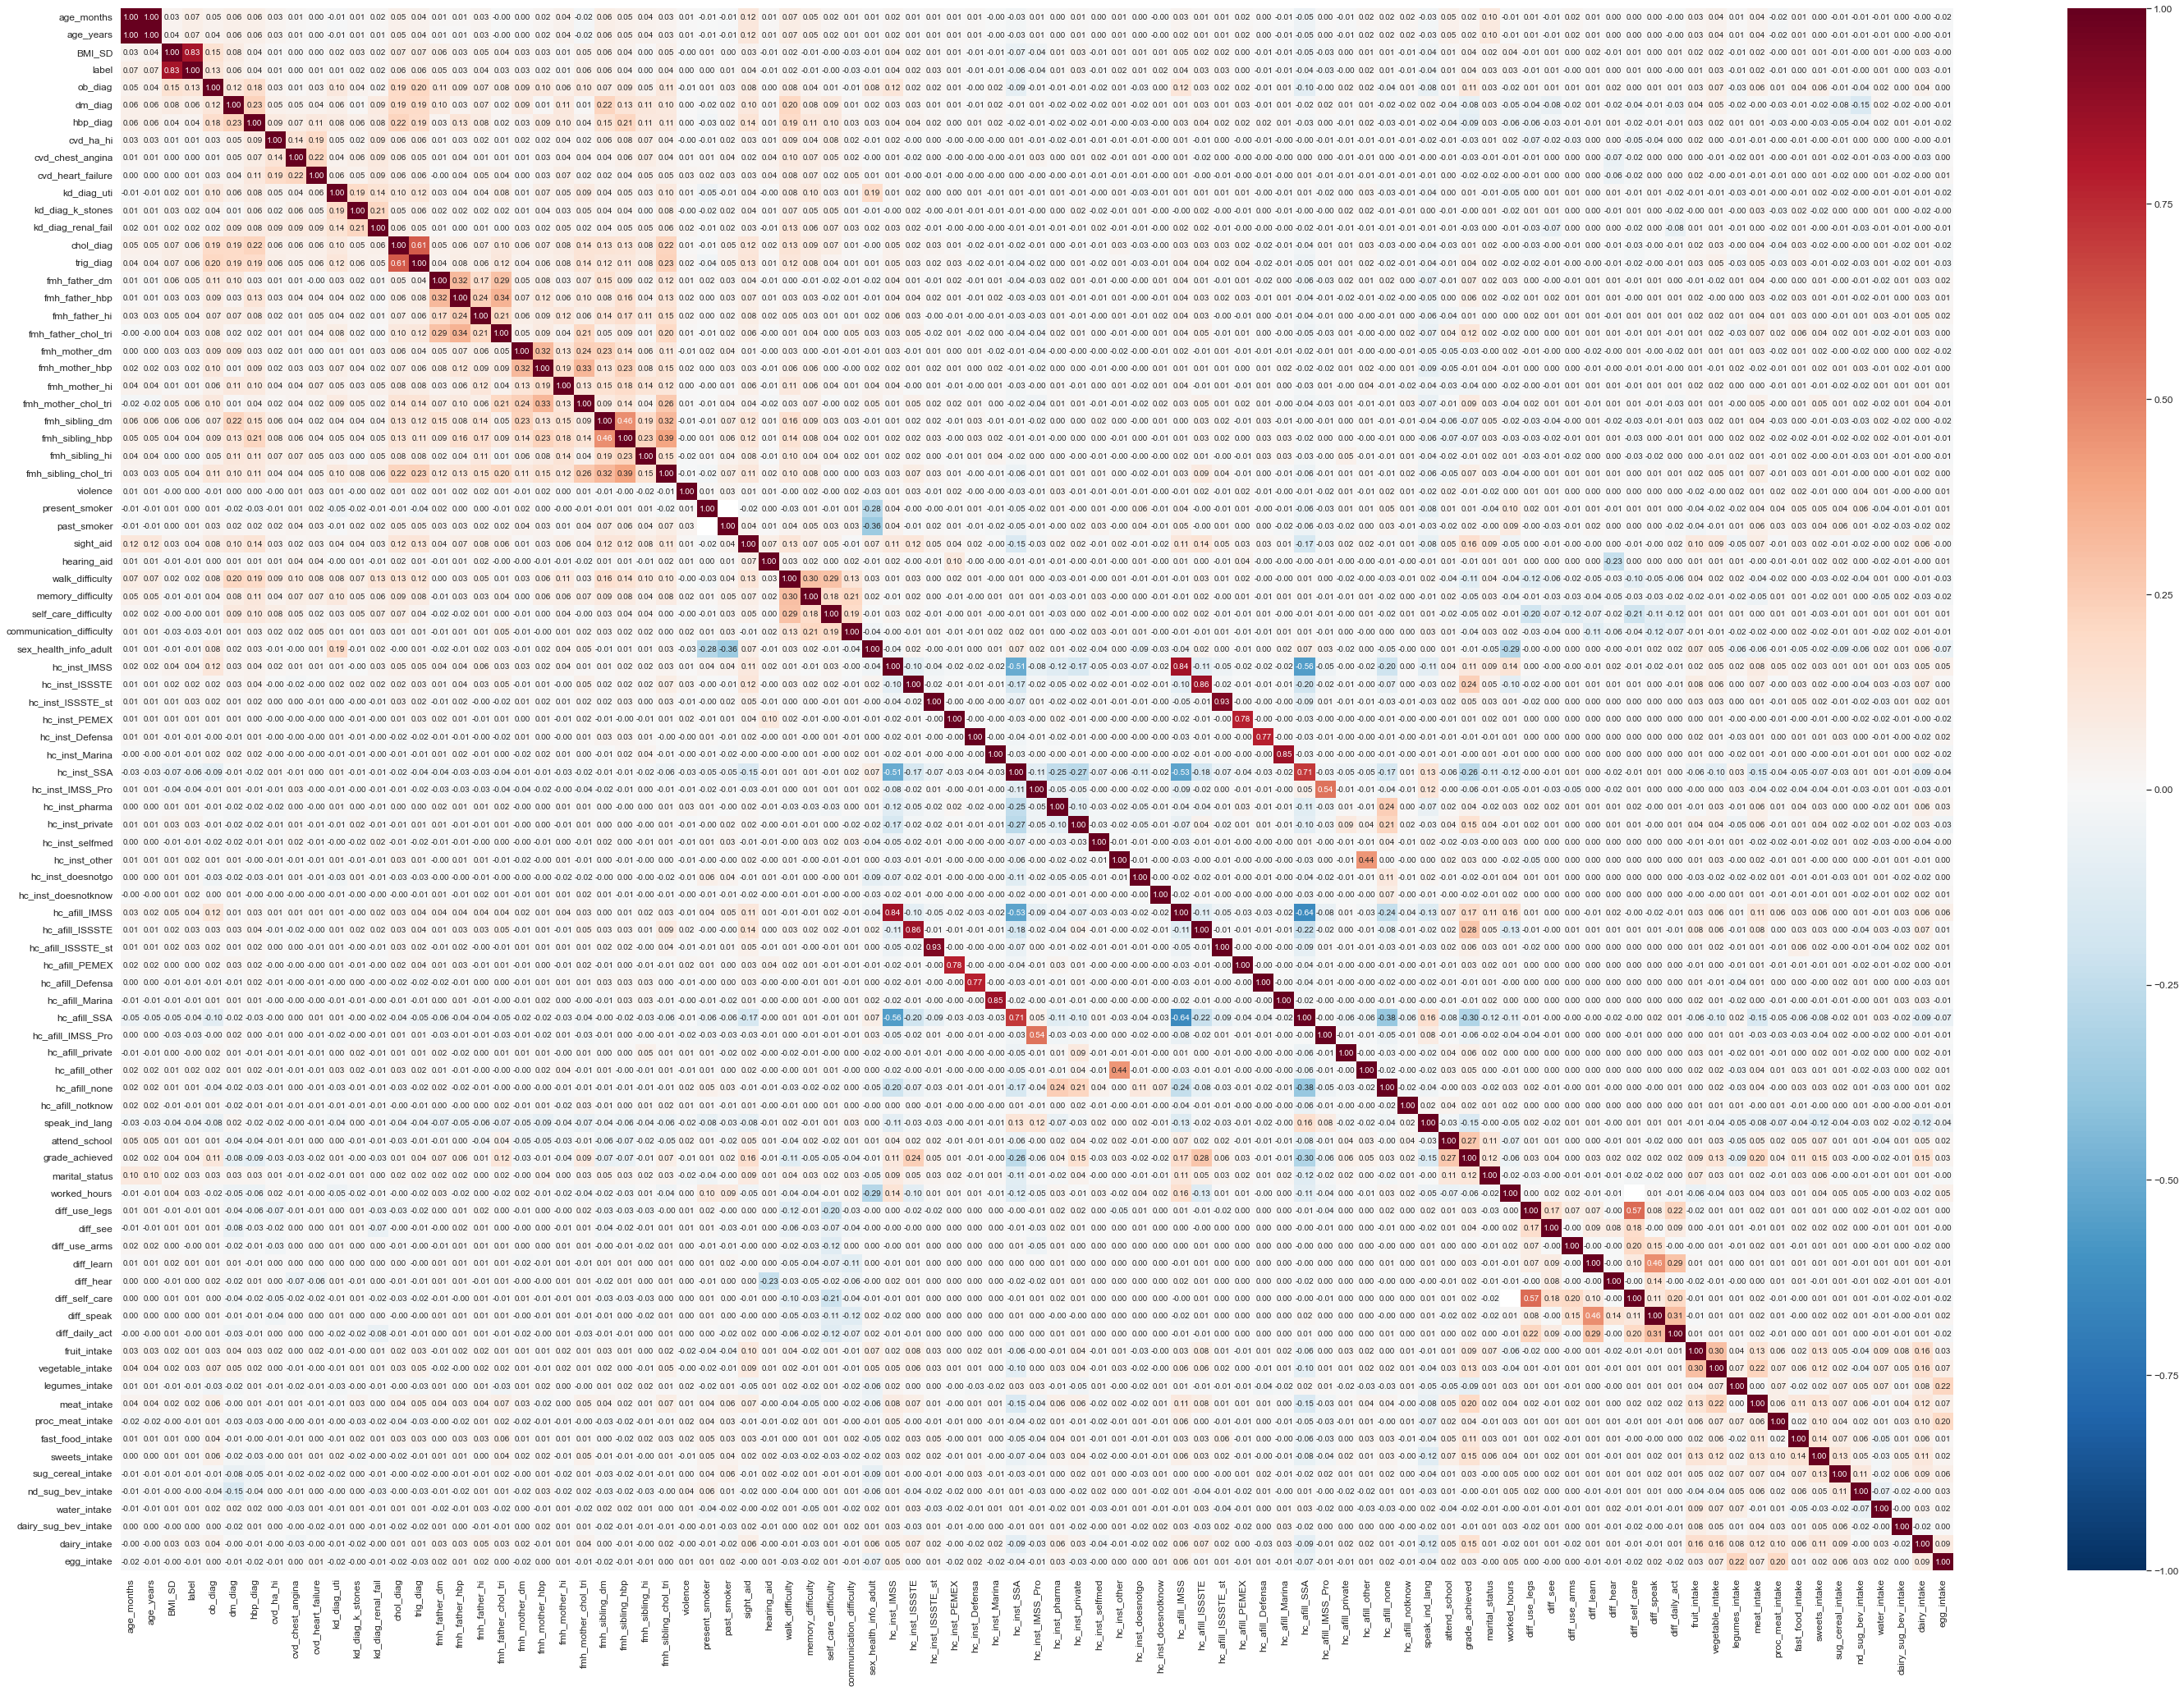

In [34]:
# Plot correlation matrix
fig, ax = plt.subplots(figsize=(50,35))
ax = heatmap(m3_dataset.corr(), fmt=".2f", annot=True, ax=ax, cmap="RdBu_r", vmin=-1, vmax=1)

There are some correlations that may cause a multi-colinearity problem for the model. In particular the answers to 2 questions> "Where do you go to receive healthcare?" and "Which healthcare institution are you affiliated to?". Since the pearson correlation in more than 0.80 in all the answers, only the first question will remain. 

In [35]:
m3_dataset = m3_dataset.drop(columns=["hc_afill_IMSS",
                        "hc_afill_ISSSTE",
                        "hc_afill_ISSSTE_st",
                        "hc_afill_PEMEX",
                        "hc_afill_Defensa",
                        "hc_afill_Marina",
                        "hc_afill_SSA",
                        "hc_afill_IMSS_Pro",
                        "hc_afill_private",
                        "hc_afill_other",
                        "hc_afill_none",
                        "hc_afill_notknow"])

In [36]:
m3_dataset.shape

(10301, 88)

In [37]:
m3_dataset.columns.tolist()

['house_ID',
 'household_ID',
 'person_ID',
 'region',
 'strata',
 'locality_type',
 'locality_size',
 'age_months',
 'age_years',
 'sex',
 'BMI_SD',
 'label_cat',
 'label',
 'ob_diag',
 'dm_diag',
 'hbp_diag',
 'cvd_ha_hi',
 'cvd_chest_angina',
 'cvd_heart_failure',
 'kd_diag_uti',
 'kd_diag_k_stones',
 'kd_diag_renal_fail',
 'chol_diag',
 'trig_diag',
 'fmh_father_dm',
 'fmh_father_hbp',
 'fmh_father_hi',
 'fmh_father_chol_tri',
 'fmh_mother_dm',
 'fmh_mother_hbp',
 'fmh_mother_hi',
 'fmh_mother_chol_tri',
 'fmh_sibling_dm',
 'fmh_sibling_hbp',
 'fmh_sibling_hi',
 'fmh_sibling_chol_tri',
 'violence',
 'present_smoker',
 'past_smoker',
 'sight_aid',
 'hearing_aid',
 'walk_difficulty',
 'memory_difficulty',
 'self_care_difficulty',
 'communication_difficulty',
 'sex_health_info_adult',
 'hc_inst_IMSS',
 'hc_inst_ISSSTE',
 'hc_inst_ISSSTE_st',
 'hc_inst_PEMEX',
 'hc_inst_Defensa',
 'hc_inst_Marina',
 'hc_inst_SSA',
 'hc_inst_IMSS_Pro',
 'hc_inst_pharma',
 'hc_inst_private',
 'hc_inst_se

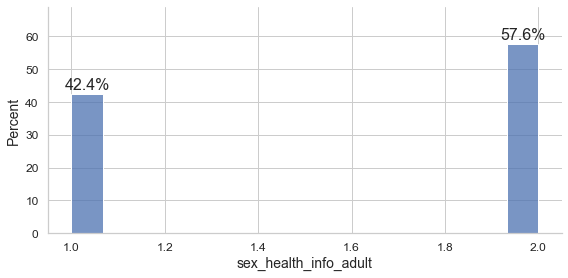

In [39]:
random_adult_sex_dist = sns.displot(data=m3_dataset, x="sex_health_info_adult", 
                       height=4, aspect=2, stat="percent")

show_label_percent(random_adult_sex_dist)

plt.show()

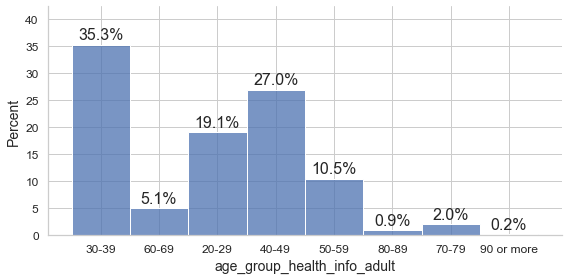

In [41]:
random_adult_age_dist = sns.displot(data=m3_dataset, x="age_group_health_info_adult", 
                       height=4, aspect=2, stat="percent")

show_label_percent(random_adult_age_dist)

plt.show()

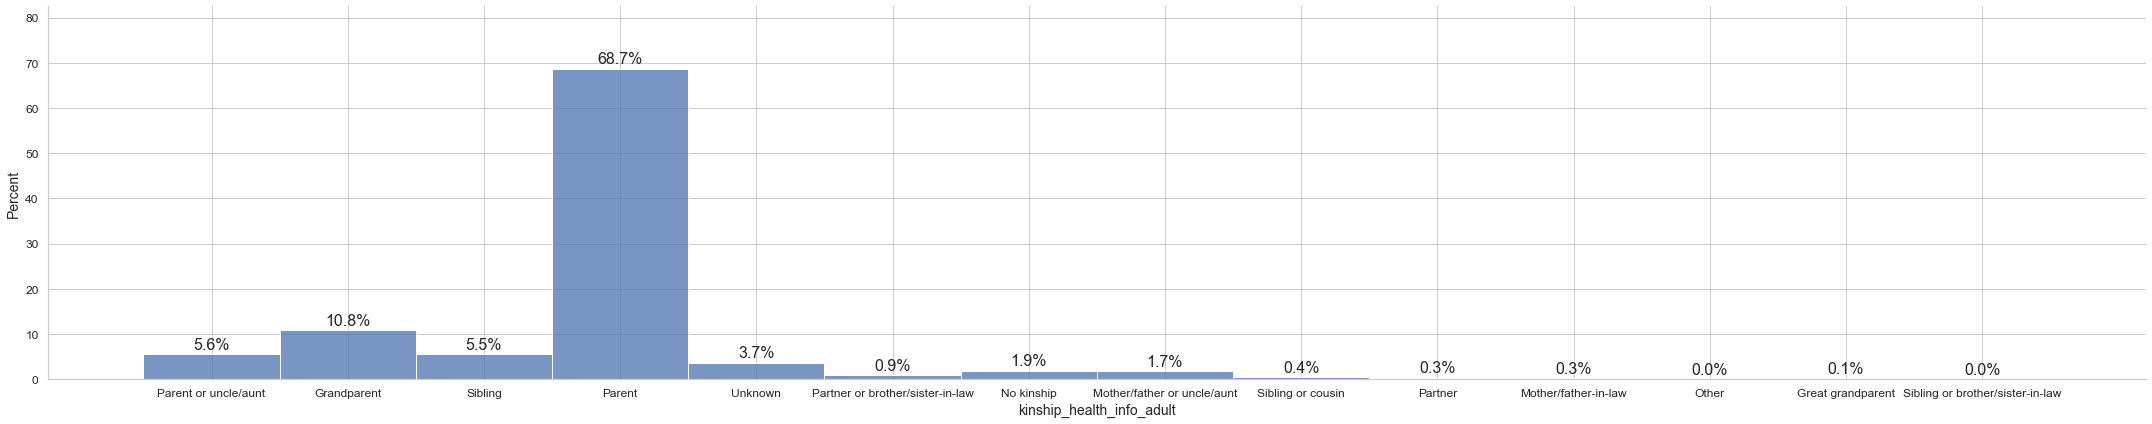

In [52]:
random_adult_kinship_dist = sns.displot(data=m3_dataset, x="kinship_health_info_adult", 
                       height=6, aspect=5, stat="percent")

show_label_percent(random_adult_kinship_dist)

plt.show()

## Export CSV for unimodal supervised and unsupervised approaches

In [57]:
# Create copy
m3_unimodal = m3_dataset.copy()

# See info
m3_unimodal.columns.tolist()

['house_ID',
 'household_ID',
 'person_ID',
 'region',
 'strata',
 'locality_type',
 'locality_size',
 'age_months',
 'age_years',
 'sex',
 'BMI_SD',
 'label_cat',
 'label',
 'ob_diag',
 'dm_diag',
 'hbp_diag',
 'cvd_ha_hi',
 'cvd_chest_angina',
 'cvd_heart_failure',
 'kd_diag_uti',
 'kd_diag_k_stones',
 'kd_diag_renal_fail',
 'chol_diag',
 'trig_diag',
 'fmh_father_dm',
 'fmh_father_hbp',
 'fmh_father_hi',
 'fmh_father_chol_tri',
 'fmh_mother_dm',
 'fmh_mother_hbp',
 'fmh_mother_hi',
 'fmh_mother_chol_tri',
 'fmh_sibling_dm',
 'fmh_sibling_hbp',
 'fmh_sibling_hi',
 'fmh_sibling_chol_tri',
 'violence',
 'present_smoker',
 'past_smoker',
 'sight_aid',
 'hearing_aid',
 'walk_difficulty',
 'memory_difficulty',
 'self_care_difficulty',
 'communication_difficulty',
 'sex_health_info_adult',
 'hc_inst_IMSS',
 'hc_inst_ISSSTE',
 'hc_inst_ISSSTE_st',
 'hc_inst_PEMEX',
 'hc_inst_Defensa',
 'hc_inst_Marina',
 'hc_inst_SSA',
 'hc_inst_IMSS_Pro',
 'hc_inst_pharma',
 'hc_inst_private',
 'hc_inst_se

In [58]:
# Export unimodal csv
m3_unimodal.to_csv(os.path.join(output_path,'m3_unimodal.csv'), index=None, header=True)

## Data preparation

### Merge based on sample dataset key
This was already done.

### Check for missing values

So far n has remained the same size from the start. A series of experiments are going to be conducted to see if it is convenient to remove more columns. It is of particular interest to conserve the worked hours feature because a higher number of working hours have been related to a decreased physical activity and decreased nutrition quality.

In [59]:
# Experiment 1: Drop all NaN
drop_all_nan = m3_dataset.copy()
drop_all_nan = drop_all_nan.dropna()
drop_all_nan.shape

(3383, 88)

In [60]:
# Experiment 2: Drop worked hours column and then remaining NaN
drop_worked_hours = m3_dataset.copy()
drop_worked_hours = drop_worked_hours.drop(columns=["worked_hours"])
drop_worked_hours = drop_worked_hours.dropna()
drop_worked_hours.shape

(5230, 87)

Since there the n when keeping the working_hours column is still larger than the minimum acceptable n=2,344, the column won't be dropped. 

In [61]:
# Drop all rows with at least one NaN value.
m3_dataset = m3_dataset.dropna()
m3_dataset.shape

(3383, 88)

### Check label distribution

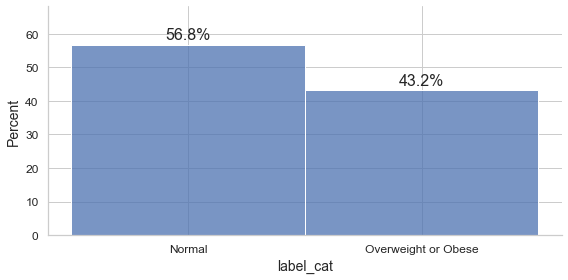

In [62]:
binary_SD_dist = sns.displot(data=m3_dataset, x="label_cat", 
                       height=4, aspect=2, stat="percent")

show_label_percent(binary_SD_dist)

plt.show()

## Group setup for LOGO CV

### Create random groups for the Leave-One-Group-Out Cross-Validation

In [63]:
# Reset index
m3_dataset.reset_index(drop=True, inplace=True)

# Create fair random groups from 1 to 5 as a numpy array and convert it into DataFrame
random_groups = np.random.uniform(1,6,size=len(m3_dataset))
random_groups = pd.DataFrame(random_groups.astype(int))

# Assign group dataframe into column "group"
m3_dataset["group"] = random_groups
m3_dataset

C:\Users\rosar\AppData\Local\Temp\ipykernel_20800\3812830012.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m3_dataset["group"] = random_groups


,house_ID,household_ID,person_ID,region,strata,locality_type,locality_size,age_months,age_years,sex,...,sweets_intake,sug_cereal_intake,nd_sug_bev_intake,water_intake,dairy_sug_bev_intake,dairy_intake,egg_intake,kinship_health_info_adult,age_group_health_info_adult,group
0,1_4,1_4_1,1_4_1_8,Centre,3rd_strata,urban,">100,000",122,10,female,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,Parent or uncle/aunt,30-39,3
1,8_1,8_1_1,8_1_1_3,Centre,3rd_strata,urban,">100,000",185,15,female,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Parent,30-39,1
2,8_1,8_1_1,8_1_1_5,Centre,3rd_strata,urban,">100,000",113,9,male,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Parent,30-39,1
3,20_2,20_2_1,20_2_1_2,Centre,3rd_strata,urban,">100,000",180,15,female,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,Parent,40-49,3
4,26_3,26_3_1,26_3_1_4,Centre,2nd_strata,urban,">100,000",97,8,male,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,Parent,40-49,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3378,3938_6,3938_6_1,3938_6_1_3,Centre,2nd_strata,rural,"<2,500",121,10,female,...,0.0,1.0,1.0,1.0,0.0,1.0,0.0,Parent,40-49,5
3379,3938_6,3938_6_1,3938_6_1_4,Centre,2nd_strata,rural,"<2,500",73,6,female,...,0.0,1.0,1.0,1.0,0.0,1.0,0.0,Parent,40-49,3
3380,3938_19,3938_19_1,3938_19_1_3,Centre,2nd_strata,rural,"<2,500",170,14,male,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,Parent,30-39,2
3381,3938_19,3938_19_1,3938_19_1_5,Centre,2nd_strata,rural,"<2,500",89,7,female,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,Parent,30-39,5


In [64]:
# Verify size, NaN and Dtype of everything
m3_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3383 entries, 0 to 3382
Data columns (total 89 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   house_ID                     3383 non-null   object 
 1   household_ID                 3383 non-null   object 
 2   person_ID                    3383 non-null   object 
 3   region                       3383 non-null   object 
 4   strata                       3383 non-null   object 
 5   locality_type                3383 non-null   object 
 6   locality_size                3383 non-null   object 
 7   age_months                   3383 non-null   int64  
 8   age_years                    3383 non-null   int64  
 9   sex                          3383 non-null   object 
 10  BMI_SD                       3383 non-null   float64
 11  label_cat                    3383 non-null   object 
 12  label                        3383 non-null   int64  
 13  ob_diag           

### Check group representation

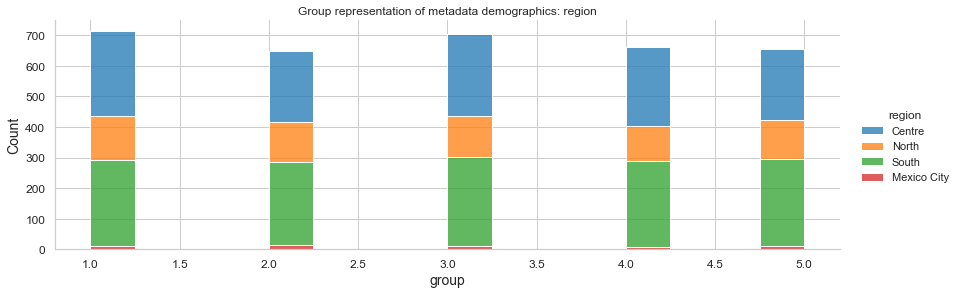

In [65]:
# Plot distributions to see representation of demographics in the groups
group_region = sns.displot(data=m3_dataset, x="group", hue="region", multiple="stack", palette="tab10",
                       height=4, aspect=3).set(title="""Group representation of metadata demographics: region""")
plt.show(group_region)

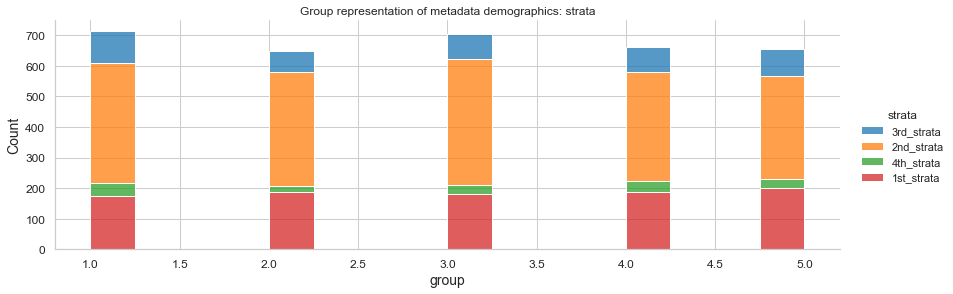

In [66]:
group_strata = sns.displot(data=m3_dataset, x="group", hue="strata", multiple="stack", palette="tab10",
                       height=4, aspect=3).set(title="""Group representation of metadata demographics: strata""")

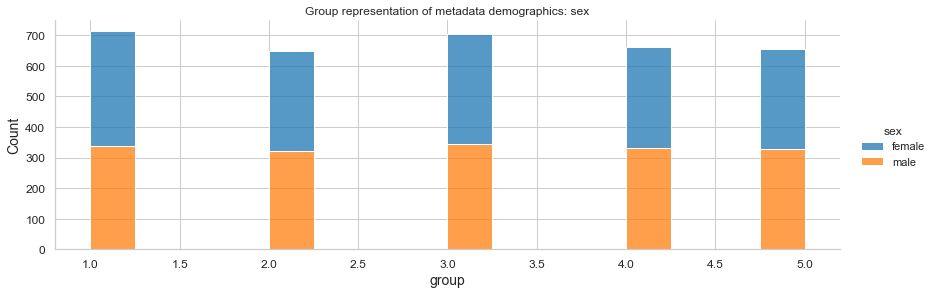

In [67]:
group_sex = sns.displot(data=m3_dataset, x="group", hue="sex", multiple="stack", palette="tab10",
                       height=4, aspect=3).set(title="""Group representation of metadata demographics: sex""")
plt.show(group_sex)

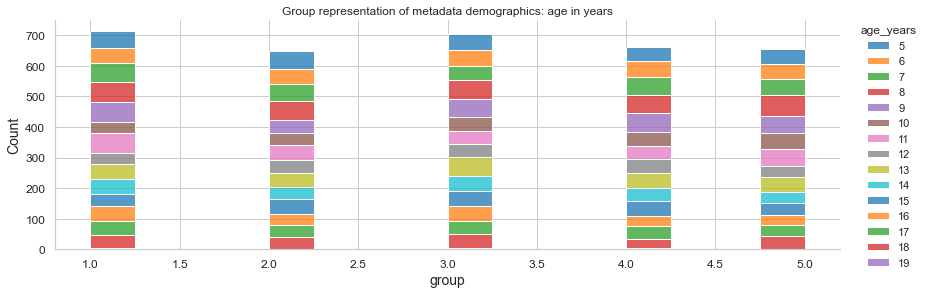

In [68]:
group_age_years = sns.displot(data=m3_dataset, x="group", hue="age_years", multiple="stack", palette="tab10",
                       height=4, aspect=3).set(title="""Group representation of metadata demographics: age in years""")

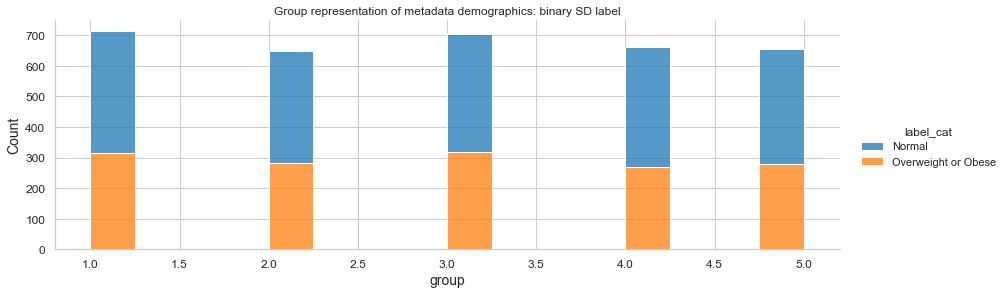

In [69]:
group_label_cat = sns.displot(data=m3_dataset, x="group", hue="label_cat", multiple="stack", palette="tab10",
                       height=4, aspect=3).set(title="""Group representation of metadata demographics: binary SD label""")
plt.show(group_label_cat)

### Remove metadata

In [70]:
# Remove unnecesary metadata keeping only the label_cat
m3_dataset = m3_dataset.drop(columns=["house_ID","household_ID","person_ID",
                                      "region","strata","locality_size","locality_type",
                                      "sex","age_months","age_years","BMI_SD","label_cat"])
m3_dataset.columns.tolist()

['label',
 'ob_diag',
 'dm_diag',
 'hbp_diag',
 'cvd_ha_hi',
 'cvd_chest_angina',
 'cvd_heart_failure',
 'kd_diag_uti',
 'kd_diag_k_stones',
 'kd_diag_renal_fail',
 'chol_diag',
 'trig_diag',
 'fmh_father_dm',
 'fmh_father_hbp',
 'fmh_father_hi',
 'fmh_father_chol_tri',
 'fmh_mother_dm',
 'fmh_mother_hbp',
 'fmh_mother_hi',
 'fmh_mother_chol_tri',
 'fmh_sibling_dm',
 'fmh_sibling_hbp',
 'fmh_sibling_hi',
 'fmh_sibling_chol_tri',
 'violence',
 'present_smoker',
 'past_smoker',
 'sight_aid',
 'hearing_aid',
 'walk_difficulty',
 'memory_difficulty',
 'self_care_difficulty',
 'communication_difficulty',
 'sex_health_info_adult',
 'hc_inst_IMSS',
 'hc_inst_ISSSTE',
 'hc_inst_ISSSTE_st',
 'hc_inst_PEMEX',
 'hc_inst_Defensa',
 'hc_inst_Marina',
 'hc_inst_SSA',
 'hc_inst_IMSS_Pro',
 'hc_inst_pharma',
 'hc_inst_private',
 'hc_inst_selfmed',
 'hc_inst_other',
 'hc_inst_doesnotgo',
 'hc_inst_doesnotknow',
 'speak_ind_lang',
 'attend_school',
 'grade_achieved',
 'marital_status',
 'worked_hours',


## Feature scaling
Since the data does not follow a Gausian distribution, the features will be standardized instead of normalized. 

### Create dummy variables of categorical features

In [71]:
# Identify categorical variables
m3_dataset.select_dtypes(include='object')

,kinship_health_info_adult,age_group_health_info_adult
0,Parent or uncle/aunt,30-39
1,Parent,30-39
2,Parent,30-39
3,Parent,40-49
4,Parent,40-49
...,...,...
3378,Parent,40-49
3379,Parent,40-49
3380,Parent,30-39
3381,Parent,30-39


Categorical values:
- kinship
- marital_satus
- grade_achieved
- age_group_health_info_adult
- sex_health_info_adult

To improve readibility of the dummy variables, the answers will be changed into categorical.

In [72]:
m3_dataset["marital_status"] = m3_dataset["marital_status"].replace([1,2,3,4,5,6,7],["free_union",
                                                                                    "separated_free_union",
                                                                                    "separated_marriage",
                                                                                    "divorced",
                                                                                    "widowed",
                                                                                    "married",
                                                                                    "single"])

m3_dataset["grade_achieved"] = m3_dataset["grade_achieved"].replace([0,1,2,3,4,5,6,7,8,9,10,11,12],["none",
                                                                                    "pre-school",
                                                                                    "primaria",
                                                                                    "secundaria",
                                                                                    "preparatoria",
                                                                                    "normal_basica",
                                                                                    "tec_com_studies_primaria",
                                                                                    "tec_com_studies_secundaria",
                                                                                    "tec_com_studies_preparatoria",
                                                                                    "normal_licenciatura",
                                                                                    "bachellors",
                                                                                    "masters",
                                                                                    "doctorate"])

m3_dataset["sex_health_info_adult"] = m3_dataset["sex_health_info_adult"].replace([1,2],["male","female"])

In [73]:
print("DataType of 'kinship': ", m3_dataset["kinship_health_info_adult"].dtype)
print("DataType of 'marital_status': ", m3_dataset["marital_status"].dtype)
print("DataType of 'grade_achieved': ", m3_dataset["grade_achieved"].dtype)
print("DataType of 'age_group_health_info_adult': ", m3_dataset["age_group_health_info_adult"].dtype)
print("DataType of 'sex_health_info_adult': ", m3_dataset["sex_health_info_adult"].dtype)

DataType of 'kinship':  object
DataType of 'marital_status':  object
DataType of 'grade_achieved':  object
DataType of 'age_group_health_info_adult':  object
DataType of 'sex_health_info_adult':  object


### Create dummy variables

In [74]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Separate metadata
metadata_df = m3_dataset[["label","group"]]
X = m3_dataset.drop(columns=["label","group"])

# Set and fit the OneHotEncoder
oneHotEncoder = OneHotEncoder(sparse=False)
X_encoded = oneHotEncoder.fit_transform(X[["kinship_health_info_adult","marital_status","grade_achieved",
                                           "age_group_health_info_adult","sex_health_info_adult"]])

# Convert it back into a dataframe
encoded_df = pd.DataFrame(X_encoded, columns=oneHotEncoder.get_feature_names_out())

# Concatenate scaled dataframe and metadata
train_m3_encoded_df = pd.concat([X,encoded_df,metadata_df], axis=1)
train_m3_encoded_df

,ob_diag,dm_diag,hbp_diag,cvd_ha_hi,cvd_chest_angina,cvd_heart_failure,kd_diag_uti,kd_diag_k_stones,kd_diag_renal_fail,chol_diag,...,age_group_health_info_adult_30-39,age_group_health_info_adult_40-49,age_group_health_info_adult_50-59,age_group_health_info_adult_60-69,age_group_health_info_adult_70-79,age_group_health_info_adult_80-89,sex_health_info_adult_female,sex_health_info_adult_male,label,group
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,3
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1,3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3378,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,5
3379,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,3
3380,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,2
3381,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,5


### Verify that everything is binary

In [75]:
train_m3_encoded_df.select_dtypes(include='object')

,sex_health_info_adult,grade_achieved,marital_status,kinship_health_info_adult,age_group_health_info_adult
0,female,preparatoria,separated_marriage,Parent or uncle/aunt,30-39
1,male,secundaria,married,Parent,30-39
2,male,secundaria,married,Parent,30-39
3,female,bachellors,single,Parent,40-49
4,male,bachellors,married,Parent,40-49
...,...,...,...,...,...
3378,male,primaria,separated_marriage,Parent,40-49
3379,male,primaria,separated_marriage,Parent,40-49
3380,male,primaria,married,Parent,30-39
3381,male,primaria,married,Parent,30-39


In [76]:
# Delete object columns
train_m3_encoded_df = train_m3_encoded_df.drop(columns=["kinship_health_info_adult","marital_status","grade_achieved", 
                                                        "age_group_health_info_adult","sex_health_info_adult"])

In [77]:
train_m3_encoded_df.select_dtypes(include='object')

""
0
1
2
3
4
...
3378
3379
3380
3381


In [78]:
train_m3_encoded_df.max(axis=0).head(60)

ob_diag                     1.0
dm_diag                     1.0
hbp_diag                    1.0
cvd_ha_hi                   1.0
cvd_chest_angina            1.0
cvd_heart_failure           1.0
kd_diag_uti                 1.0
kd_diag_k_stones            1.0
kd_diag_renal_fail          1.0
chol_diag                   1.0
trig_diag                   1.0
fmh_father_dm               1.0
fmh_father_hbp              1.0
fmh_father_hi               1.0
fmh_father_chol_tri         1.0
fmh_mother_dm               1.0
fmh_mother_hbp              1.0
fmh_mother_hi               1.0
fmh_mother_chol_tri         1.0
fmh_sibling_dm              1.0
fmh_sibling_hbp             1.0
fmh_sibling_hi              1.0
fmh_sibling_chol_tri        1.0
violence                    1.0
present_smoker              0.0
past_smoker                 1.0
sight_aid                   1.0
hearing_aid                 1.0
walk_difficulty             1.0
memory_difficulty           1.0
self_care_difficulty        1.0
communic

In [79]:
train_m3_encoded_df.max(axis=0).tail(60)

diff_hear                                                     1.0
diff_self_care                                                1.0
diff_speak                                                    1.0
diff_daily_act                                                1.0
fruit_intake                                                  1.0
vegetable_intake                                              1.0
legumes_intake                                                1.0
meat_intake                                                   1.0
proc_meat_intake                                              1.0
fast_food_intake                                              1.0
sweets_intake                                                 1.0
sug_cereal_intake                                             1.0
nd_sug_bev_intake                                             1.0
water_intake                                                  1.0
dairy_sug_bev_intake                                          1.0
dairy_inta

In [80]:
train_m3_encoded_df.shape

(3383, 113)

## Export datasets

In [81]:
# Export standardized dataset
train_m3_encoded_df.to_csv(os.path.join(output_path,'train_m3_encoded_df.csv'), index=None, header=True)